## CHAPTER 9

# Plotting and Visualization


In [292]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [293]:
# %matplotlib inline

## 9.1 A Brief matplotlib API Primer


In [294]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

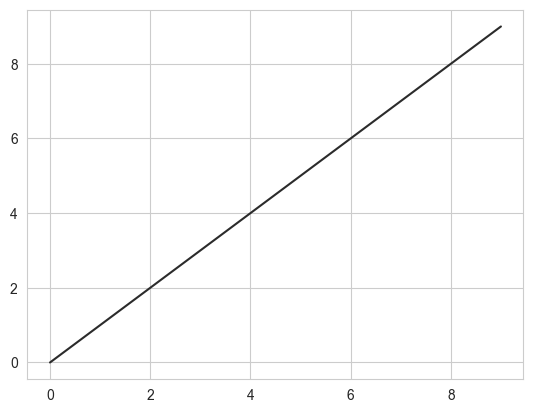

In [295]:
plt.plot(data)

### Figures and Subplots


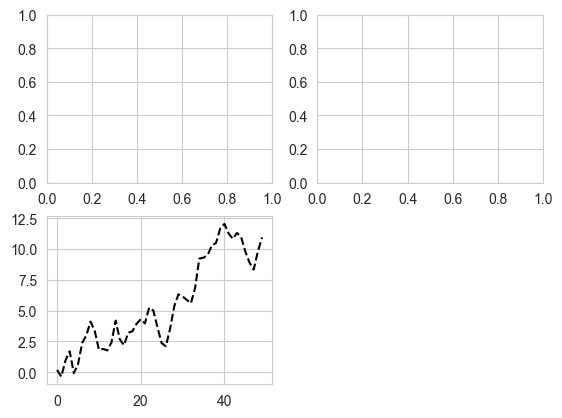

In [296]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")
# One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so you must put all of the plotting commands in a single notebook cell.

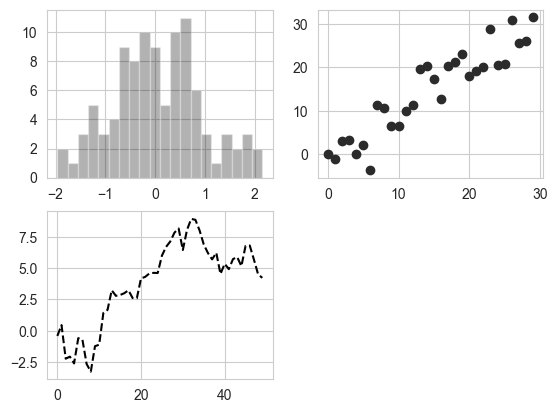

In [297]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

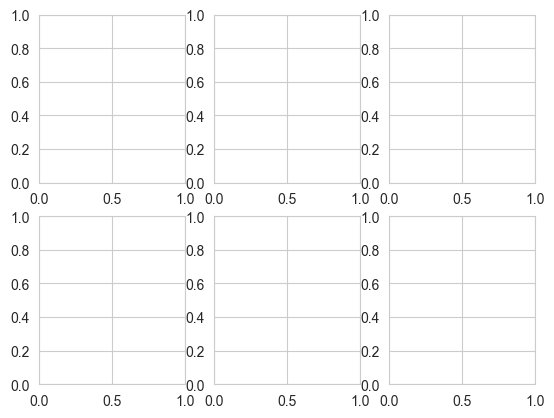

In [298]:
fig, axes = plt.subplots(2, 3)
axes

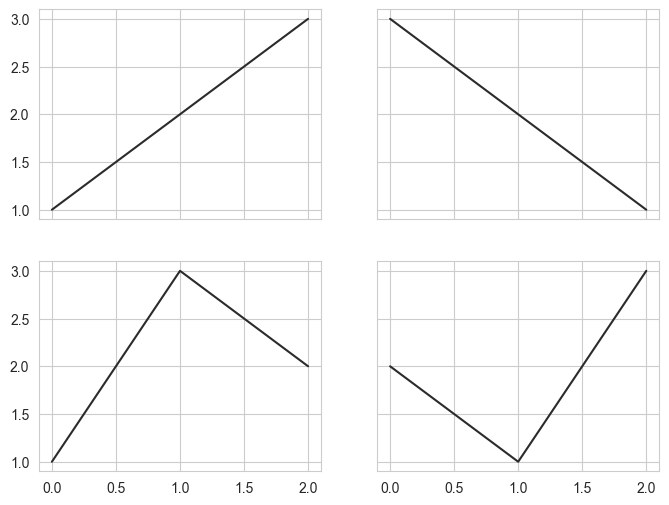

In [299]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8, 6))

axes[0, 0].plot([1, 2, 3])
axes[0, 1].plot([3, 2, 1])
axes[1, 0].plot([1, 3, 2])
axes[1, 1].plot([2, 1, 3])

### Adjusting the spacing around subplots


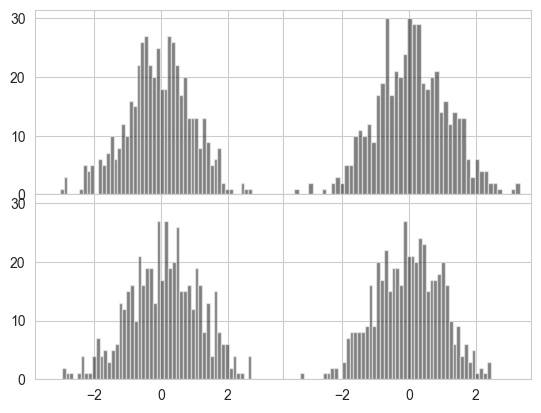

In [300]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(
            np.random.standard_normal(500), bins=50, color="black", alpha=0.5
        )
fig.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles


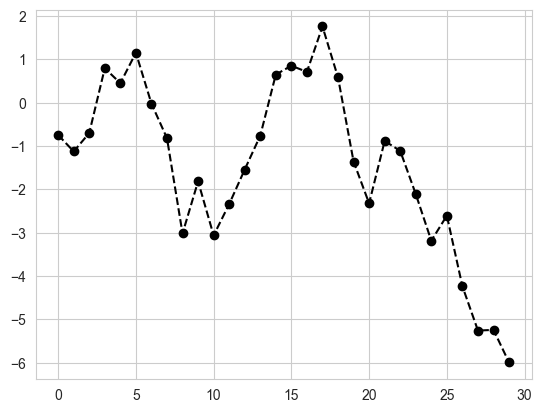

In [301]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(
    np.random.standard_normal(30).cumsum(),
    color="black",
    linestyle="dashed",
    marker="o",
)

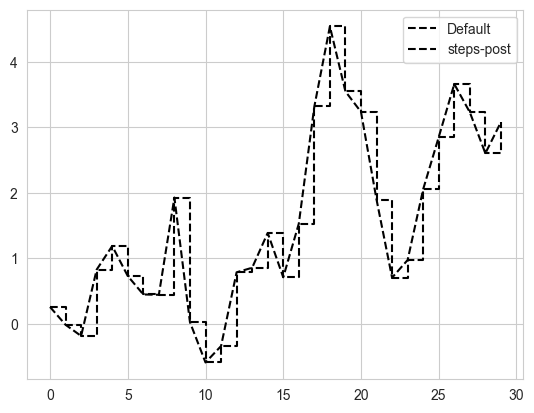

In [302]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(
    data, color="black", linestyle="dashed", drawstyle="steps-post", label="steps-post"
)
ax.legend()

### Ticks, Labels, and Legends


Text(0.5, 1.0, 'My First Matplotlib Plot')

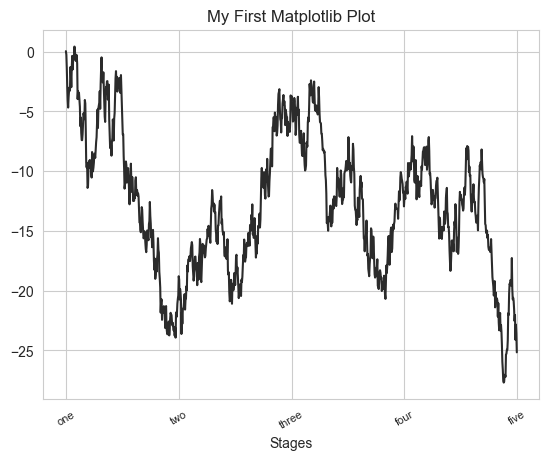

In [303]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(
    ["one", "two", "three", "four", "five"], rotation=30, fontsize=8
)
ax.set_xlabel("Stages")
ax.set_title("My First Matplotlib Plot")
# ax.set(title="My first matplotlib plot", xlabel="Stages")

#### Adding legends


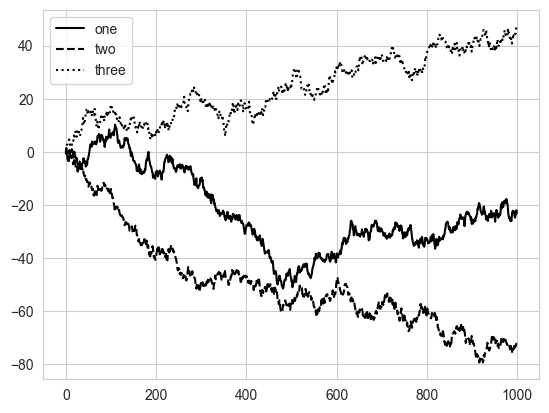

In [304]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum(), color="black", label="one")
ax.plot(
    np.random.standard_normal(1000).cumsum(),
    color="black",
    label="two",
    linestyle="dashed",
)
ax.plot(
    np.random.standard_normal(1000).cumsum(),
    color="black",
    label="three",
    linestyle="dotted",
)
ax.legend()

### Annotations and Drawing on a Subplot


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

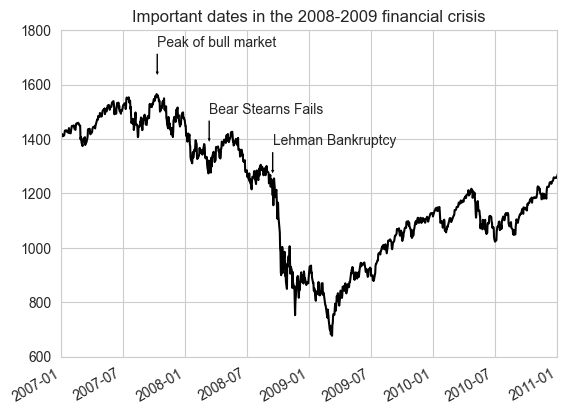

In [305]:
from datetime import datetime

fig, ax = plt.subplots()
data = pd.read_csv("ch09/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]
spx.plot(ax=ax, color="black")
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy"),
]
for date, label in crisis_data:
    ax.annotate(
        label,
        xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
        horizontalalignment="left",
        verticalalignment="top",
    )
    # Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")

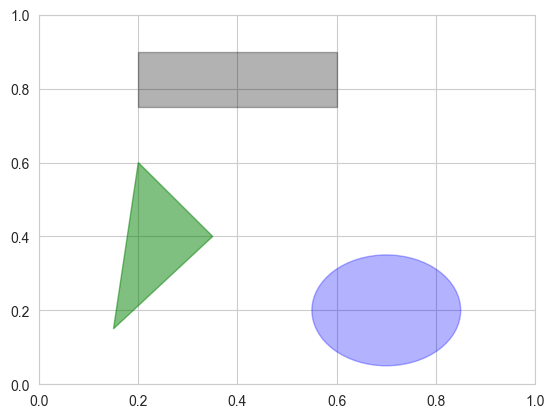

In [306]:
fig, ax = plt.subplots()
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
# Saving Plots to File
fig.savefig("figpath.png")
fig.savefig("figpath1.png", dpi=400)


### matplotlib Configuration

In [307]:
# plt.rcParams
plt.rc("figure", figsize=(10, 10))
plt.rc("font", family="monospace", weight="bold", size=8)
plt.rcdefaults()  # reset to default

## 9.2 Plotting with pandas and seaborn

### Line Plots

<Axes: >

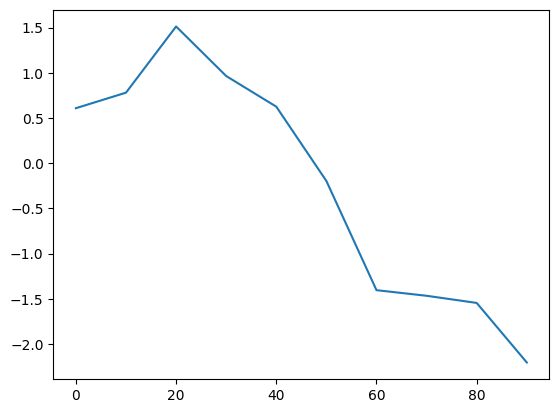

In [308]:
s = pd.Series(np.random.standard_normal(10).cumsum(),
              index=np.arange(0, 100, 10))
s.plot()

<Axes: >

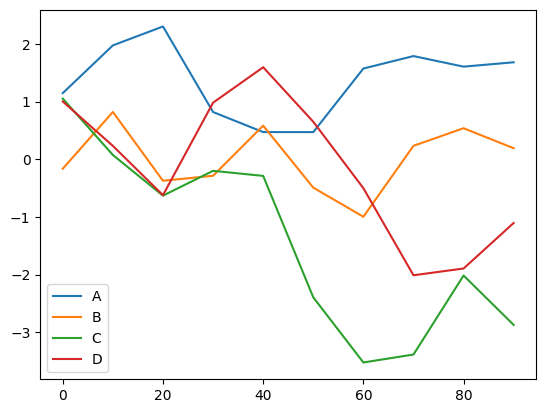

In [309]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(axis=0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
# plt.style.use("grayscale")
df.plot()

### Bar Plots

<Axes: >

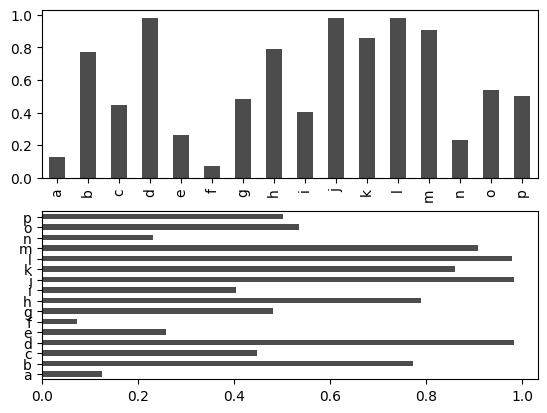

In [310]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), 
                 index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

<Axes: >

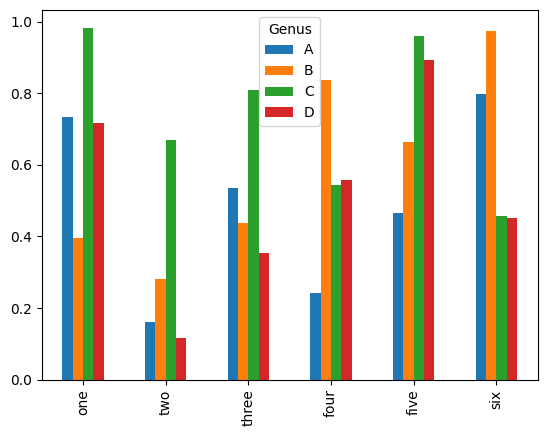

In [311]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df
df.plot.bar()

<Axes: >

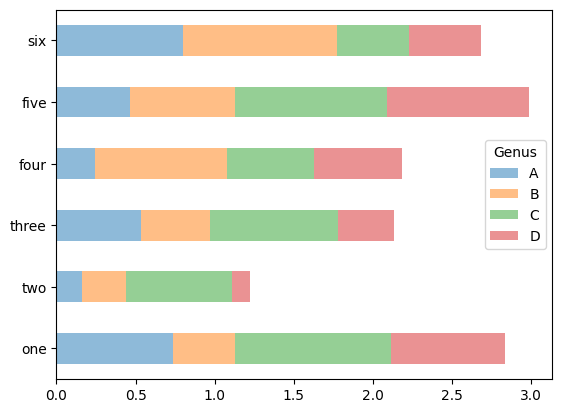

In [312]:
df.plot.barh(stacked=True, alpha=0.5)

In [313]:
tips = pd.read_csv("examples/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [314]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [315]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [316]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

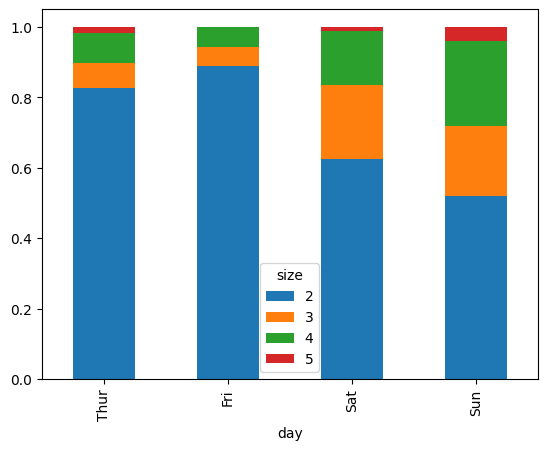

In [317]:
party_pcts.plot.bar(stacked=True)

In [318]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

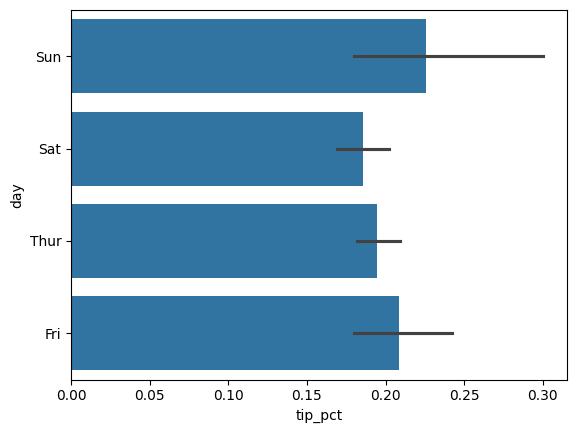

In [319]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")


<Axes: xlabel='tip_pct', ylabel='day'>

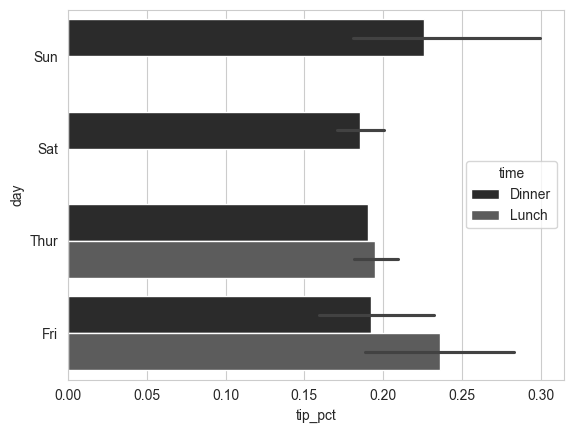

In [320]:
sns.set_style("whitegrid")
sns.set_palette("Greys_r")
sns.barplot(y="day", x="tip_pct", data=tips, orient="h", hue="time")

### Histograms and Density Plots

<Axes: ylabel='Frequency'>

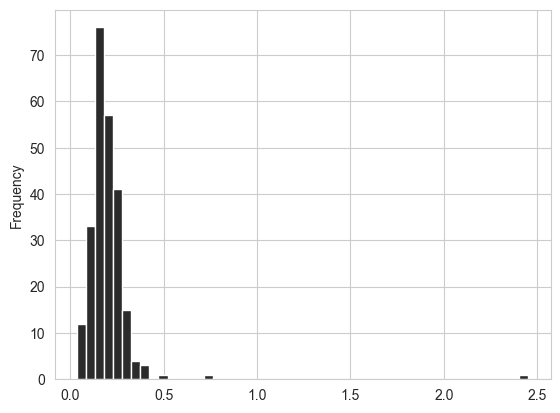

In [321]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

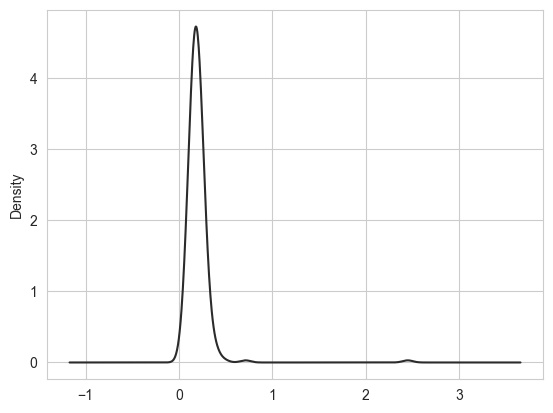

In [ ]:
# pip install scipy
tips["tip_pct"].plot.density()

<Axes: ylabel='Count'>

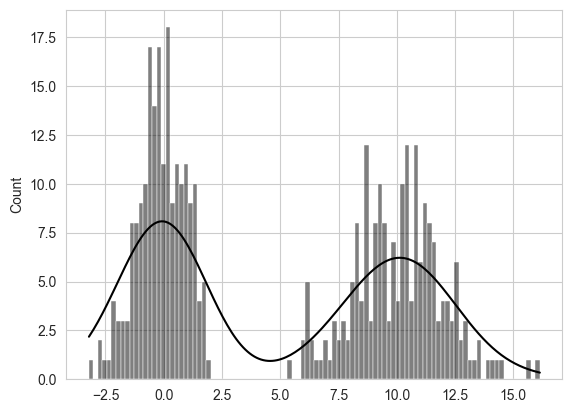

In [328]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, kde=True, color="black")

In [325]:
values

0       0.341980
1       0.019450
2       0.537502
3      -1.288804
4       0.806662
         ...    
395    10.644982
396    12.887153
397    11.794248
398    11.219062
399     7.925712
Length: 400, dtype: float64